# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import xgboost

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Import Dataset

In [2]:
# path = 'F:/data_glacier_internship/week7/dataset/bank/bank-additional/bank-additional/'

path = 'F:/data_glacier_internship/week7/dataset/bank/bank-additional/'

In [3]:
data = 'bank-additional-full.csv'

In [4]:
# Use the 'read_csv()' function to read the CSV file into a Pandas DataFrame
df = pd.read_csv(path + data, sep=';')


# Look into dataset

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Get the structure of the dataset
print(df.info())

# Get the summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preprocessing

In [7]:
df['age'].dtype

dtype('int64')

In [8]:
df.loc[(df['age'] >= 18) & (df['age'] <= 40), 'age'] = 1
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age'] = 2
df.loc[df['age'] >= 60, 'age'] = 3

In [9]:
df['duration'] = pd.cut(df['duration'], bins=[0, 5, 10, float('inf')], labels=[1, 2, 3])
df['duration'] = df['duration'].astype('category')

In [10]:
# Replace 999 with 0 and 1
df["pdays"] = df["pdays"].apply(lambda x: 0 if x == 999 else 1)

# Convert pdays to a factor
df["pdays"] = pd.Categorical(df["pdays"])

In [11]:
# split data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import OneHotEncoder
# select categorical features to be one-hot encoded
categorical_features = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# one-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])

# replace categorical features in the dataframe with the encoded features
df.drop(categorical_features, axis=1, inplace=True)
encoded_feature_names = encoder.get_feature_names(categorical_features)
df[encoded_feature_names] = encoded_categorical_features

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,2,3,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,3,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
df.isnull().sum()

age                     0
duration                4
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 64, dtype: int64

In [15]:
df.dropna(inplace=True)

# Random Forest Classifier

In [16]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

In [17]:
# Check data types of features
print(X_train.dtypes)
print(X_test.dtypes)

age                        int64
duration                category
campaign                   int64
pdays                   category
previous                   int64
                          ...   
day_of_week_tue          float64
day_of_week_wed          float64
poutcome_failure         float64
poutcome_nonexistent     float64
poutcome_success         float64
Length: 63, dtype: object
age                        int64
duration                category
campaign                   int64
pdays                   category
previous                   int64
                          ...   
day_of_week_tue          float64
day_of_week_wed          float64
poutcome_failure         float64
poutcome_nonexistent     float64
poutcome_success         float64
Length: 63, dtype: object


In [18]:

# initialize the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rfc.fit(X_train, y_train)

# predict the target variable for the test data
y_pred = rfc.predict(X_test)

# evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred, pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='yes', average='weighted'))

Accuracy: 0.8838169236372466
Precision: 0.49070631970260226
Recall: 0.2787750791974657
F1 Score: 0.8694024263695561


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# Find out Important Features

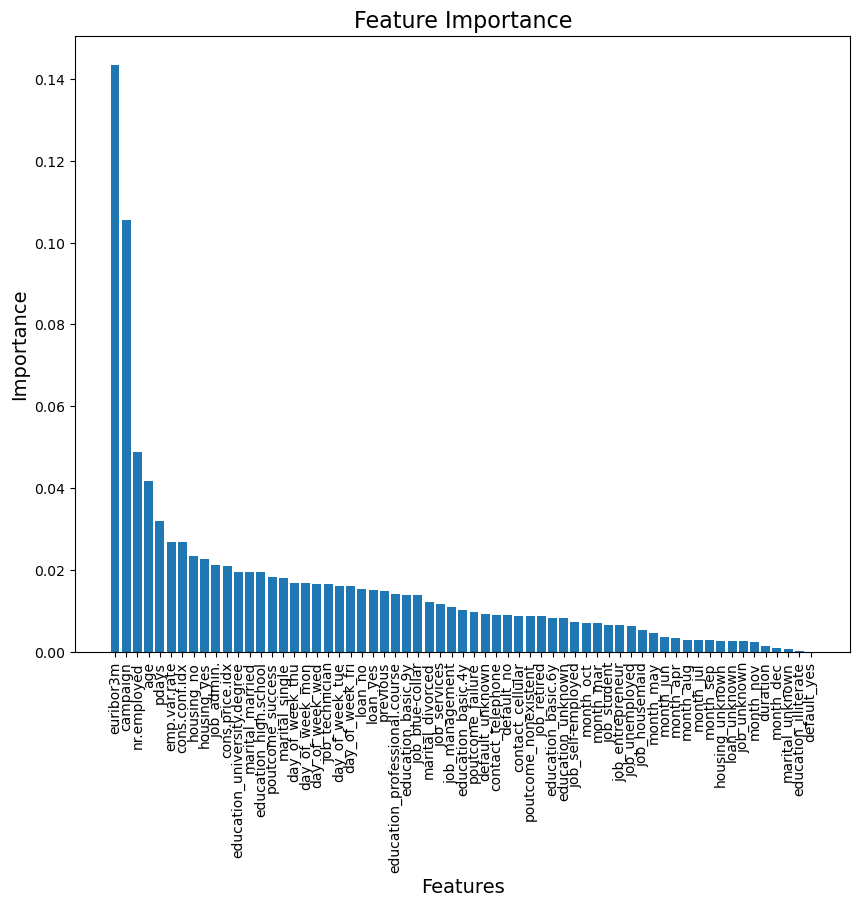

In [19]:
# get feature importances
importances = rfc.feature_importances_

# get feature names
feature_names = X_train.columns

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.show()

# Confustion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

# make predictions on the test dataset using the trained random forest model
y_pred = rfc.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('[[true negative  false positive]')
print('[false negative  true positive]]')
print(cm)

[[true negative  false positive]
[false negative  true positive]]
[[7016  274]
 [ 683  264]]


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# fit logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict target variable for the test data
y_pred = lr.predict(X_test)

# evaluate model performance using classification report
print(classification_report(y_test, y_pred))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7290
         yes       0.59      0.22      0.32       947

    accuracy                           0.89      8237
   macro avg       0.75      0.60      0.63      8237
weighted avg       0.87      0.89      0.87      8237



In [22]:
prob_pred = lr.predict_proba(X_test)[:, 1]

# Confusion Matrix

In [23]:
y_pred = np.where(prob_pred > 0.5, 'yes', 'no')
cm = confusion_matrix(y_test, y_pred)
print('[[true negative  false positive]')
print('[false negative  true positive]]')
print(cm)

[[true negative  false positive]
[false negative  true positive]]
[[7142  148]
 [ 735  212]]
